## Covid-19 Exploratory Data Analysis
### Import libraries

In [49]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

### Load data
Source for this next dataset:
https://data.cms.gov/covid-19/medicare-covid-19-cases-hospitalizations

In [10]:
hospital_cases_df = pd.read_csv('COVID19_PUB_DATA_FILE_211120_211221_20211217.csv')

In [11]:
hospital_cases_df

,Claims_Thru_Dt,Measure_Level,Measure_Element,Measure_Unit,Value
0,02/20/2021,COVID-19 Cases,Overall,Beneficiary Count,3860957
1,02/20/2021,COVID-19 Cases,Overall,Beneficiary Count per 100K,6144
2,02/20/2021,COVID-19 Cases by Age Group,65-74,Beneficiary Count,1473512
3,02/20/2021,COVID-19 Cases by Age Group,65-74,Beneficiary Count per 100K,5031
4,02/20/2021,COVID-19 Cases by Age Group,75-84,Beneficiary Count,1145747
...,...,...,...,...,...
12611,11/20/2021,COVID-19 Hospitalizations by Race and Medicare...,Other/Unknown - Disabled,Beneficiary Count per 100K,1723
12612,11/20/2021,COVID-19 Hospitalizations by Race and Medicare...,Other/Unknown - Esrd,Beneficiary Count per 100K,11172
12613,11/20/2021,COVID-19 Hospitalizations by Race and Medicare...,White - Aged,Beneficiary Count per 100K,2287
12614,11/20/2021,COVID-19 Hospitalizations by Race and Medicare...,White - Disabled,Beneficiary Count per 100K,2081


In [12]:
hospital_cases_df.groupby('Measure_Level').nunique()

,Claims_Thru_Dt,Measure_Element,Measure_Unit,Value
Measure_Level,,,,
COVID-19 Cases,10,1,2,20
COVID-19 Cases by Age Group,10,5,2,90
COVID-19 Cases by Dual Status,10,3,2,50
COVID-19 Cases by Dual Status and Age Group,10,9,2,169
COVID-19 Cases by Dual Status and Medicare Status,10,7,2,130
COVID-19 Cases by Dual Status and Race,10,13,2,249
COVID-19 Cases by Dual Status and Sex,10,5,2,90
COVID-19 Cases by Medicare Status,10,4,2,70
COVID-19 Cases by Race,10,7,2,130


### Making some individual dataframes

In [15]:
# function to extract and format specific meaasures from the larger dataset

def separate_and_clean(measure_level, measure_element_name):
    # select measure level
    new_df = hospital_cases_df.loc[hospital_cases_df['Measure_Level'] == measure_level]

    # retaining counts per 100K (not total counts)
    new_df = new_df.loc[new_df['Measure_Unit'] == 'Beneficiary Count per 100K']

    # dropping columns that are not necessary since they are now the same for the whole dataframe
    new_df.drop(columns=['Measure_Level', 'Measure_Unit'], inplace=True)

    # rename columns
    new_df.columns = ['Claims_Thru_Dt', measure_element_name, 'Beneficiary_Count_per_100K']
    new_df.reset_index(drop=True, inplace=True)
    return new_df

In [16]:
Covid_cases_by_state_df = separate_and_clean('COVID-19 Cases by State', 'State')
Covid_cases_by_state_df

,Claims_Thru_Dt,State,Beneficiary_Count_per_100K
0,02/20/2021,Alabama,8142
1,02/20/2021,Alaska,2896
2,02/20/2021,Arizona,7309
3,02/20/2021,Arkansas,7014
4,02/20/2021,California,5285
...,...,...,...
655,11/20/2021,Virginia,7280
656,11/20/2021,Washington,4922
657,11/20/2021,West Virginia,9427
658,11/20/2021,Wisconsin,7671


In [17]:
# checking for null values
Covid_cases_by_state_df.isna().sum()

Claims_Thru_Dt                0
State                         0
Beneficiary_Count_per_100K    0
dtype: int64

In [18]:
# checking for duplicates
Covid_cases_by_state_df.drop_duplicates(inplace=True)

In [63]:
# some rows labeled as 'Missing Data' with no state

Covid_cases_by_state_df = Covid_cases_by_state_df.loc[Covid_cases_by_state_df['State'] != 'Missing Data']

### Visualize breakdown by state

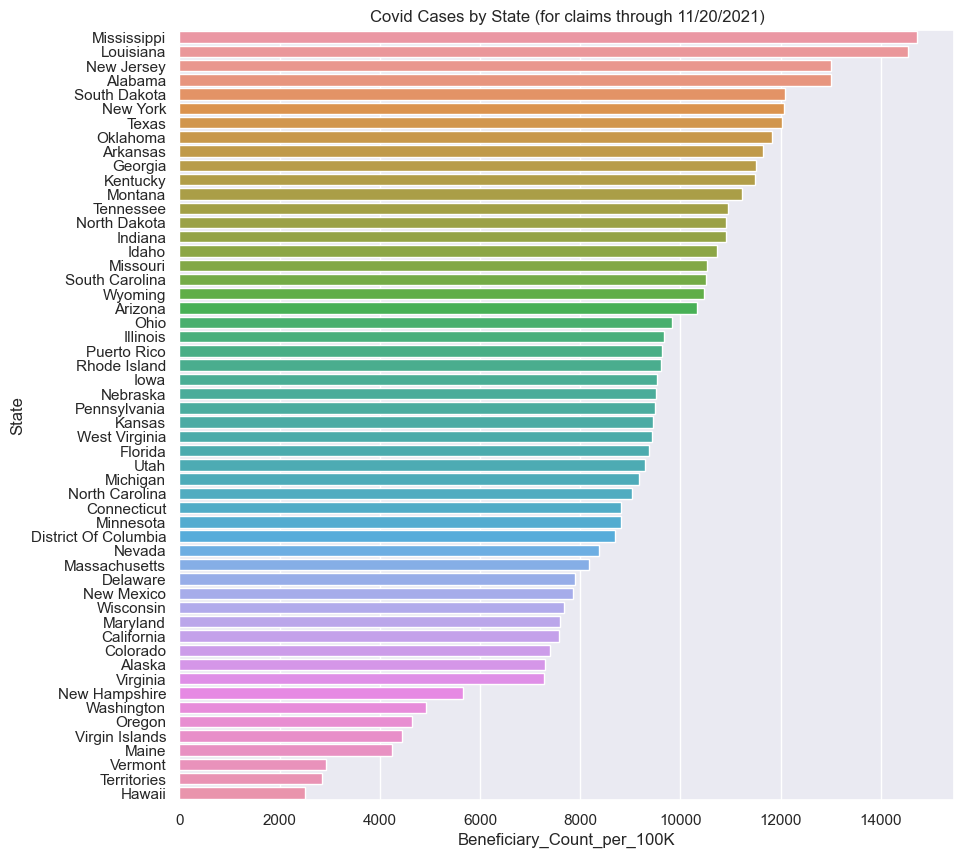

In [74]:
#select most recent values and sort
plot_cases_by_state = Covid_cases_by_state_df.loc[Covid_cases_by_state_df['Claims_Thru_Dt'] == '11/20/2021']
plot_cases_by_state = plot_cases_by_state.sort_values('Beneficiary_Count_per_100K', ascending=False)

#define figure size
sns.set(rc={"figure.figsize":(10, 10)})

#plot
sns.barplot(data=plot_cases_by_state, y='State', x='Beneficiary_Count_per_100K')
plt.title('Covid Cases by State (for claims through 11/20/2021)')
plt.show()

### Save data to CSV

In [43]:
Covid_cases_by_state_df.to_csv('Covid_cases_by_state.csv')

### Let's get data on Covid by age group

In [19]:
# using function defined above
Covid_by_age_df = separate_and_clean('COVID-19 Cases by Age Group', 'Age_Group')
Covid_by_age_df

,Claims_Thru_Dt,Age_Group,Beneficiary_Count_per_100K
0,02/20/2021,65-74,5031
1,02/20/2021,75-84,6314
2,02/20/2021,85 And Over,9826
3,02/20/2021,Less Than 65,6311
4,03/20/2021,65-74,5380
5,03/20/2021,75-84,6691
6,03/20/2021,85 And Over,10298
7,03/20/2021,Less Than 65,6776
8,04/24/2021,65-74,5711
9,04/24/2021,75-84,7040


In [20]:
Covid_by_age_df.isna().sum()

Claims_Thru_Dt                0
Age_Group                     0
Beneficiary_Count_per_100K    0
dtype: int64

In [21]:
Covid_by_age_df.drop_duplicates(inplace=True)

### Visualize

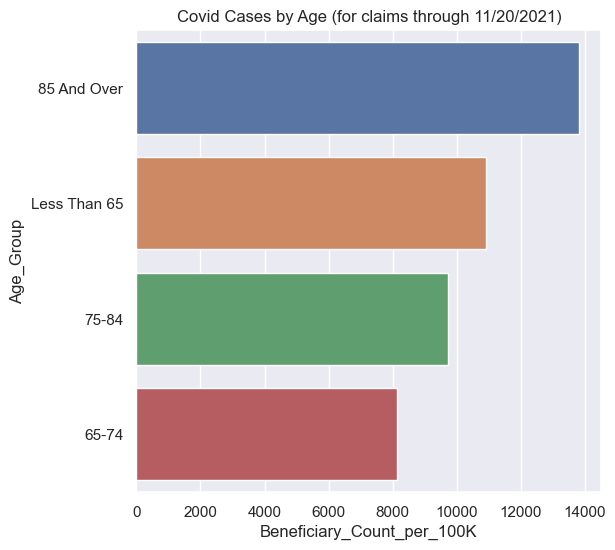

In [82]:
#select most recent values and sort
plot_cases_by_age = Covid_by_age_df.loc[Covid_by_age_df['Claims_Thru_Dt'] == '11/20/2021']
plot_cases_by_age = plot_cases_by_age.sort_values('Beneficiary_Count_per_100K', ascending=False)

#define figure size
sns.set(rc={"figure.figsize":(6, 6)})

#plot
sns.barplot(data=plot_cases_by_age, y='Age_Group', x='Beneficiary_Count_per_100K')
plt.title('Covid Cases by Age (for claims through 11/20/2021)')
plt.show()

### Save to CSV

In [44]:
Covid_by_age_df.to_csv('Covid_by_age.csv')

### Looking at impact of Covid by race

In [22]:
Covid_by_race_df = separate_and_clean('COVID-19 Cases by Race', 'Race')
Covid_by_race_df

,Claims_Thru_Dt,Race,Beneficiary_Count_per_100K
0,02/20/2021,American Indian / Alaska Native,9490
1,02/20/2021,Asian / Pacific Islander,4235
2,02/20/2021,Black/African American,7626
3,02/20/2021,Hispanic,8413
4,02/20/2021,Other/Unknown,4418
...,...,...,...
67,11/20/2021,Asian / Pacific Islander,6101
68,11/20/2021,Black/African American,11182
69,11/20/2021,Hispanic,12300
70,11/20/2021,Other/Unknown,7017


In [23]:
Covid_by_race_df.isna().sum()

Claims_Thru_Dt                0
Race                          0
Beneficiary_Count_per_100K    0
dtype: int64

In [24]:
Covid_by_race_df.drop_duplicates(inplace=True)

### Visualize

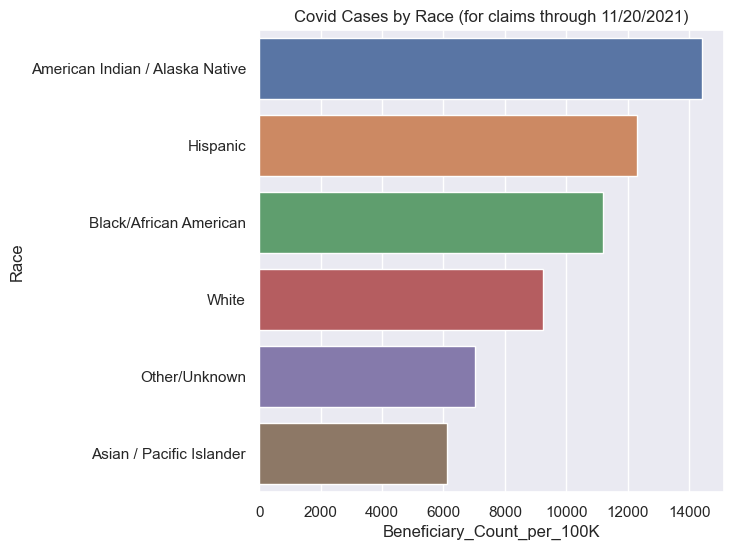

In [83]:
#select most recent values and sort
plot_cases_by_race = Covid_by_race_df.loc[Covid_by_race_df['Claims_Thru_Dt'] == '11/20/2021']
plot_cases_by_race = plot_cases_by_race.sort_values('Beneficiary_Count_per_100K', ascending=False)

#define figure size
sns.set(rc={"figure.figsize":(6, 6)})

#plot
sns.barplot(data=plot_cases_by_race, y='Race', x='Beneficiary_Count_per_100K')
plt.title('Covid Cases by Race (for claims through 11/20/2021)')
plt.show()

### Save

In [45]:
Covid_by_race_df.to_csv('Covid_by_race.csv')

### Breakdown by Medicare Status

In [25]:
Covid_by_MC_status_df = separate_and_clean('COVID-19 Cases by Medicare Status', 'Medicare_Status')
Covid_by_MC_status_df

,Claims_Thru_Dt,Medicare_Status,Beneficiary_Count_per_100K
0,02/20/2021,Aged,6047
1,02/20/2021,Disabled,6067
2,02/20/2021,ESRD,19492
3,03/20/2021,Aged,6412
4,03/20/2021,Disabled,6516
5,03/20/2021,ESRD,20610
6,04/24/2021,Aged,6738
7,04/24/2021,Disabled,6940
8,04/24/2021,ESRD,21520
9,05/22/2021,Aged,6916


In [26]:
Covid_by_MC_status_df.isna().sum()

Claims_Thru_Dt                0
Medicare_Status               0
Beneficiary_Count_per_100K    0
dtype: int64

In [27]:
Covid_by_MC_status_df.drop_duplicates(inplace=True)

### Visualize

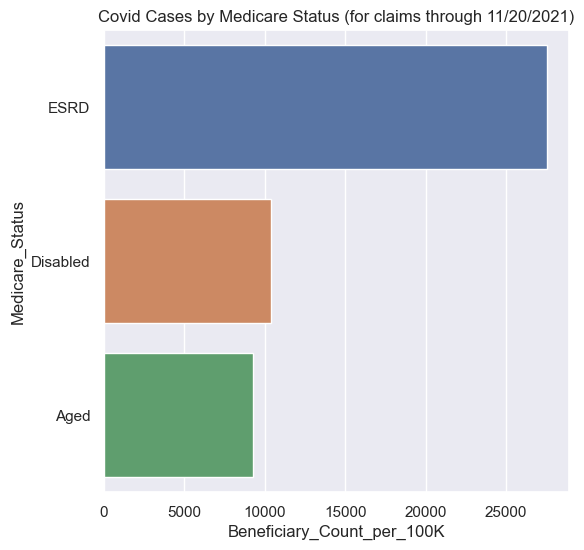

In [86]:
#select most recent values and sort
plot_cases_by_MC = Covid_by_MC_status_df.loc[Covid_by_MC_status_df['Claims_Thru_Dt'] == '11/20/2021']
plot_cases_by_MC = plot_cases_by_MC.sort_values('Beneficiary_Count_per_100K', ascending=False)

#define figure size
sns.set(rc={"figure.figsize":(6, 6)})

#plot
sns.barplot(data=plot_cases_by_MC, y='Medicare_Status', x='Beneficiary_Count_per_100K')
plt.title('Covid Cases by Medicare Status (for claims through 11/20/2021)')
plt.show()

### Save

In [46]:
Covid_by_MC_status_df.to_csv('Covid_by_MC_status.csv')

### Looking at Covid-related Hospitalizations by State

In [28]:
Covid_hospitalizations_by_state_df = separate_and_clean('COVID-19 Hospitalizations by State', 'State')
Covid_hospitalizations_by_state_df

,Claims_Thru_Dt,State,Beneficiary_Count_per_100K
0,02/20/2021,Alabama,2392
1,02/20/2021,Alaska,824
2,02/20/2021,Arizona,1890
3,02/20/2021,Arkansas,1707
4,02/20/2021,California,1386
...,...,...,...
655,11/20/2021,Virginia,2178
656,11/20/2021,Washington,1322
657,11/20/2021,West Virginia,2445
658,11/20/2021,Wisconsin,2121


In [29]:
Covid_hospitalizations_by_state_df.isna().sum()

Claims_Thru_Dt                0
State                         0
Beneficiary_Count_per_100K    0
dtype: int64

In [30]:
Covid_hospitalizations_by_state_df.drop_duplicates(inplace=True)

In [89]:
Covid_hospitalizations_by_state_df = Covid_hospitalizations_by_state_df.loc[Covid_hospitalizations_by_state_df['State'] != 'Missing Data']

### Visualize

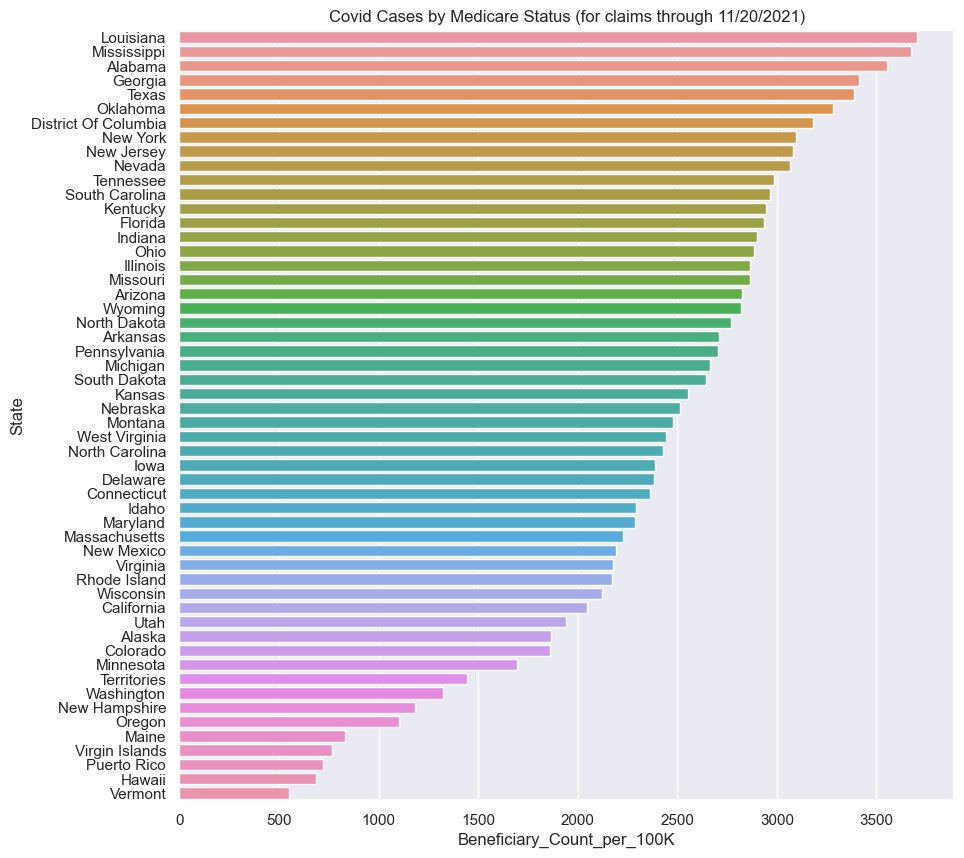

In [90]:
#select most recent values and sort
plot_hosp_by_state = Covid_hospitalizations_by_state_df.loc[Covid_hospitalizations_by_state_df['Claims_Thru_Dt'] == '11/20/2021']
plot_hosp_by_state = plot_hosp_by_state.sort_values('Beneficiary_Count_per_100K', ascending=False)

#define figure size
sns.set(rc={"figure.figsize":(10, 10)})

#plot
sns.barplot(data=plot_hosp_by_state, y='State', x='Beneficiary_Count_per_100K')
plt.title('Covid Cases by Medicare Status (for claims through 11/20/2021)')
plt.show()

### Save

In [47]:
Covid_hospitalizations_by_state_df.to_csv('Covid_hospitalizations_by_state.csv')